In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import seaborn as sns

df = pd.read_csv('train.csv')
df

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,<=7jt
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,<=7jt
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,>7jt
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,<=7jt
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,>7jt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,35989,47,Pekerja Bebas Bukan Perusahan,148169,SMA,9,Menikah,Perbaikan Kerajinan,Laki2,0.0,0.0,40.0,<=7jt
35990,35990,69,Pekerja Bebas Perusahaan,264722,D3,12,Menikah,Sales,Laki2,0.0,0.0,40.0,>7jt
35991,35991,24,Pekerja Bebas Bukan Perusahan,31606,Sarjana,13,Menikah,Spesialis,Perempuan,0.0,0.0,20.0,>7jt
35992,35992,47,Wiraswasta,197836,SMA,9,Menikah,Sales,Laki2,0.0,0.0,45.0,<=7jt


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35994 entries, 0 to 35993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35994 non-null  int64  
 1   Umur                   35994 non-null  int64  
 2   Kelas Pekerja          35994 non-null  object 
 3   Berat Akhir            35994 non-null  int64  
 4   Pendidikan             35994 non-null  object 
 5   Jmlh Tahun Pendidikan  35994 non-null  int64  
 6   Status Perkawinan      35994 non-null  object 
 7   Pekerjaan              35994 non-null  object 
 8   Jenis Kelamin          35994 non-null  object 
 9   Keuntungan Kapital     35994 non-null  float64
 10  Kerugian Capital       35994 non-null  float64
 11  Jam per Minggu         35994 non-null  float64
 12  Gaji                   35994 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 2.7+ MB


In [3]:
df.describe()

,id,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
count,35994.000000,35994.000000,3.599400e+04,35994.000000,3.599400e+04,3.599400e+04,35994.000000
mean,17996.500000,38.664555,1.899318e+05,10.079874,1.503923e+07,1.217974e+06,40.435656
std,10390.717131,13.676266,1.058023e+05,2.574813,1.029919e+08,5.631544e+06,12.367552
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,8998.250000,28.000000,1.177670e+05,9.000000,0.000000e+00,0.000000e+00,40.000000
50%,17996.500000,37.000000,1.784665e+05,10.000000,0.000000e+00,0.000000e+00,40.000000
75%,26994.750000,48.000000,2.379185e+05,12.000000,0.000000e+00,0.000000e+00,45.000000
max,35993.000000,90.000000,1.490400e+06,16.000000,1.399986e+09,6.098400e+07,99.000000


In [4]:
#replace
df['Gaji'] = df['Gaji'].replace({'<=7jt':0,'>7jt':1})

In [5]:
df['Pekerjaan'] = df['Pekerjaan'].replace({'?':'Spesialis'})

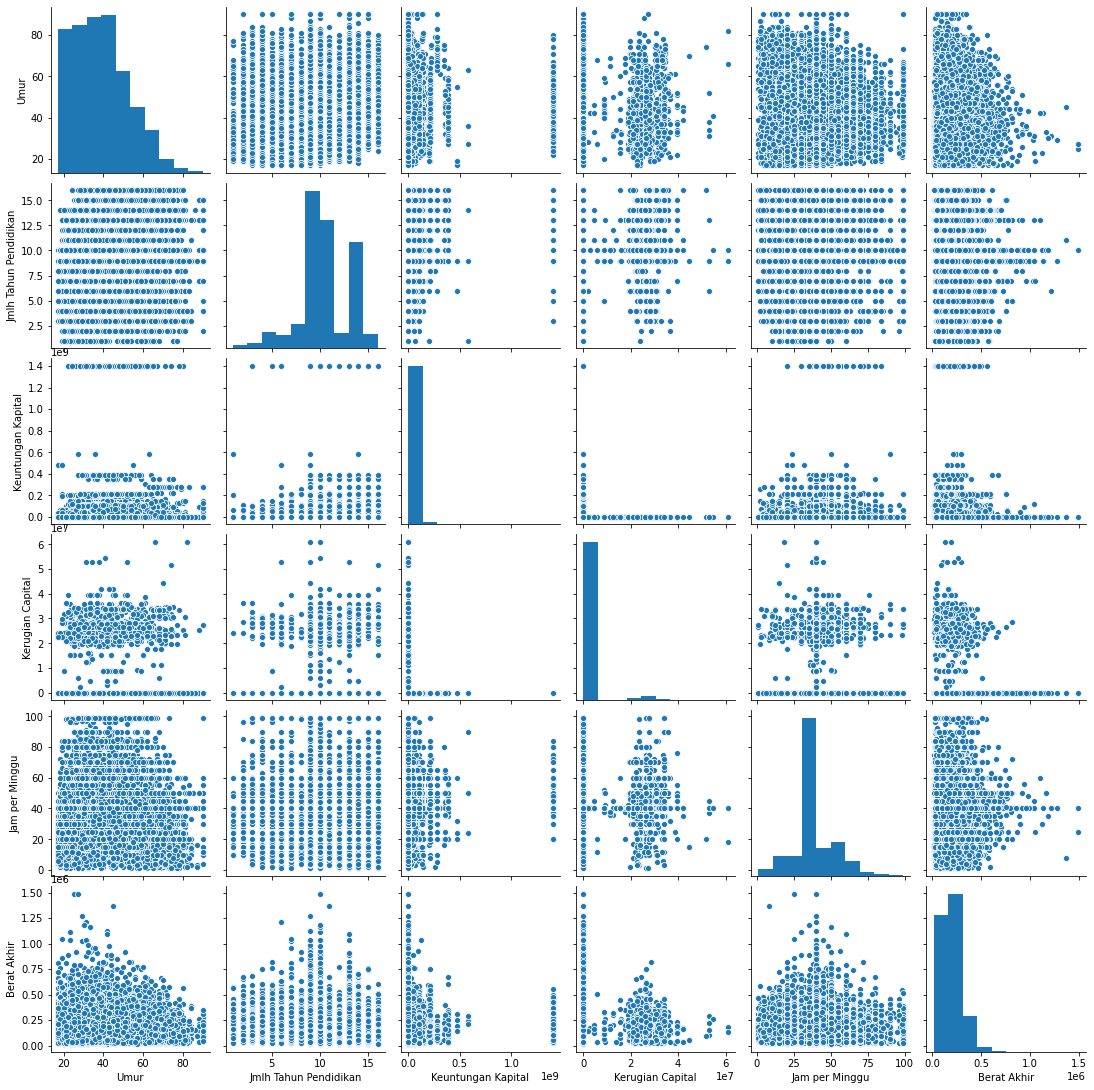

In [6]:
columns = df[['Umur','Jmlh Tahun Pendidikan','Keuntungan Kapital','Kerugian Capital','Jam per Minggu','Berat Akhir']]
sns.pairplot(columns, palette='dark')
plt.show()

In [7]:
#replace
kelamin = {'Perempuan':0, 'Laki2':1}
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace(kelamin)

In [8]:
df['Status Perkawinan'].unique()

array(['Belum Pernah Menikah', 'Cerai', 'Menikah', 'Janda', 'Berpisah',
       'Menikah LDR'], dtype=object)

In [9]:
df['Pekerjaan'].unique()

array(['Servis Lainnya', 'Ekesekutif Managerial', 'Spesialis',
       'Perbaikan Kerajinan', 'Sales', 'Pembersih', 'Pemuka Agama',
       'Petani', 'Tech-support', 'Mesin Inspeksi', 'Supir',
       'Asisten Rumah Tangga', 'Penjaga', 'Tentara'], dtype=object)

In [10]:
#pre precessing
df = df.drop(['id','Pendidikan'], axis=1)

In [11]:
#encoding
df = pd.get_dummies(df)

In [12]:
df

,Umur,Berat Akhir,Jmlh Tahun Pendidikan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji,Kelas Pekerja_?,Kelas Pekerja_Pekerja Bebas Bukan Perusahan,...,Pekerjaan_Pemuka Agama,Pekerjaan_Penjaga,Pekerjaan_Perbaikan Kerajinan,Pekerjaan_Petani,Pekerjaan_Sales,Pekerjaan_Servis Lainnya,Pekerjaan_Spesialis,Pekerjaan_Supir,Pekerjaan_Tech-support,Pekerjaan_Tentara
0,21,242912,9,0,0.0,0.0,35.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,49,140782,6,0,0.0,0.0,40.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44,120057,12,1,61404000.0,0.0,45.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,194630,13,1,0.0,0.0,35.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,219619,14,1,210336000.0,0.0,40.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35989,47,148169,9,1,0.0,0.0,40.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
35990,69,264722,12,1,0.0,0.0,40.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
35991,24,31606,13,0,0.0,0.0,20.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
35992,47,197836,9,1,0.0,0.0,45.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
#inisialisasi x dan y
x = df.drop('Gaji', axis=1)
y = df['Gaji']

In [14]:
#standardisasi
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [15]:
#KNN
model = KNeighborsClassifier()
parameter = {'n_neighbors':np.arange(2,20), 'leaf_size':np.arange(2,10), 'weights':['uniform','distance']}
rdcv = RandomizedSearchCV(model, parameter, cv=5, scoring='roc_auc', n_iter=20)
rdcv.fit(x,y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'leaf_size': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'weights': ['uniform', 'distance']},
                   scoring='roc_auc')

In [16]:
rdcv.best_params_

{'weights': 'uniform', 'n_neighbors': 19, 'leaf_size': 6}

In [17]:
rdcv.best_score_

0.8802859403146132

In [23]:
#read data test
df_test = pd.read_csv('test.csv')

#pre precessing
df_test['Pekerjaan'] = df_test['Pekerjaan'].replace({'?':'Spesialis'})
kelamin = {'Perempuan':0, 'Laki2':1}
df_test['Jenis Kelamin'] = df_test['Jenis Kelamin'].replace(kelamin)
df_test = df_test.drop(['id','Pendidikan'], axis=1)
df_test = pd.get_dummies(df_test)

#inisialisasi x dan y
x_test = df_test

#scaling
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

#fitting and predicting
model = KNeighborsClassifier(n_neighbors=16, weights='distance', leaf_size=3)
model.fit(x,y)
y_predict = model.predict(x_test)

In [34]:
ID = pd.read_csv('test.csv')
submission = pd.DataFrame(ID['id'])
submission['Gaji'] = y_predict

In [36]:
submission.to_csv('submission.csv', index=False)